# Use Case 1: Comparing Omics Data

## Step 1: Importing packages and setting up your notebook.

This use case will guide you through basic features of our package, including importing the data, interacting with the dataframes, and producing a basic scatterplot comparing proteomics and transcriptomics for a given gene. We will begin by importing standard data analysis libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will import the CPTAC package. This includes both data on endometrial cancer patients and functions that will allow the user to access and perform basic operations on the data.

In [2]:
import CPTAC.Endometrial as en

Welcome to the CPTAC data service package. This import contains
information about the package. In order to access a specific data set,
import a CPTAC subfolder by either 'import CPTAC.DataName' or 'from
CPTAC import DataName'.
Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


## Step 2: Getting data 

Now that the package is imported, we can begin to extract the data we need. In this case, we need the proteomics and transcriptomics data for the endometrial cancer patients. For a full list of available data and functions, enter <big><code><font color=blue>en.help()</font></code></big>. This will bring you to the documentation on our website.

In [3]:
proteomics = en.get_proteomics()
transcriptomics = en.get_transcriptomics()

## Step 3: Merging dataframes

We use the <big><code><font color=blue>en.compare_gene()</font></code></big> function to join two data frames on a common gene. All entries for that gene that do not exist simultaneously in both dataframes will be discarded.

In [4]:
A1BG_cross = en.compare_gene(proteomics, transcriptomics, 'A1BG')
A1BG_cross.head()

,proteomics,transcriptomics_linear
S001,-1.180,4.02
S002,-0.685,4.81
S003,-0.528,6.24
S005,-1.670,5.31
S006,-0.374,9.84


## Step 4: Plot data

Finally, we will plot the transcriptomics data against the proteomics data. We use the Seaborn library for our tutorials, but you can get similar results using matplotlib.pyplot. The first plot we will make (for the A1BG gene) has a positive correlation between the proteomics and transcriptomics data.

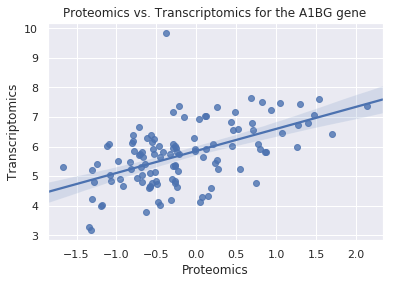

In [8]:
sns.set(style="darkgrid")
plot = sns.regplot(x="proteomics", y="transcriptomics_linear", 
                   data=A1BG_cross)
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', 
         title='Proteomics vs. Transcriptomics for the A1BG gene')
plt.show()

## Step 5: Plot more data

We can perform this process for many other genes to find different correlations. The RPL11 gene is an example of slightly negative to no correlation between the proteomics and transcriptomics data.

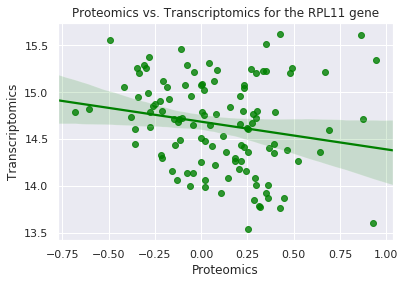

In [6]:
gene = 'RPL11'
gene_cross = en.compare_gene(proteomics, transcriptomics, gene)
plot = sns.regplot(x=gene_cross.columns[0], y=gene_cross.columns[1], data=gene_cross, color="green")
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', title='Proteomics vs. Transcriptomics for the ' + gene + ' gene')
plt.show()

## Step 6: Repeat with Ovarian dataset

Below, we provide a demonstration of how to go through this same process for the Ovarian dataset.

Loading Ovarian CPTAC data:
Loading phosphoproteomics data...
Loading transcriptomics data...
Loading somatic_19 data...
Loading somatic_38 data...
Loading clinical data...
Loading proteomics data...
Loading cnv data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until June 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


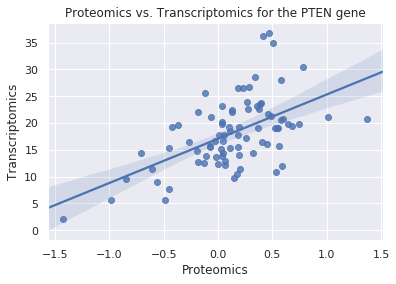

In [7]:
import CPTAC.Ovarian as ov

proteomics = ov.get_proteomics()
transcriptomics = ov.get_transcriptomics()

cross = ov.compare_gene(proteomics, transcriptomics, 'PTEN')

sns.set(style="darkgrid")
plot = sns.regplot(x="proteomics", y="transcriptomics", data=cross)
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', title='Proteomics vs. Transcriptomics for the PTEN gene')
plt.show()